# (Ford Go Bike Exploration)
## by (Moamen Mohamed Mohasseb)

## Preliminary Wrangling

> Briefly introduce your dataset here.

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

### What is the structure of your dataset?

> Number of rows 183412 , Data columns  16 columns.

### What is/are the main feature(s) of interest in your dataset?

> what is the relation between gender and bike rental? what is the average duration? what is the average age that this bike? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Member_gender , user_type  trip duration ,duration_sec ,start_station_name and member_birth_year.

In [134]:
#load data
bike_df=pd.read_csv("201902-fordgobike-tripdata.csv")
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [135]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [136]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [137]:
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [138]:
bike_df[bike_df.start_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [139]:
bike_df.query("start_station_latitude == 37.40 and start_station_id== 'NaN' ")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.4,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.4,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.4,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174807,8209,2019-02-02 14:26:59.9650,2019-02-02 16:43:49.5180,NaN,NaN,37.4,-121.93,NaN,NaN,37.41,-121.94,4249,Subscriber,1993.0,Male,Yes
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.4,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.4,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [140]:
bike_df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [141]:
(bike_df[bike_df['member_birth_year']<1940])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
5197,217,2019-02-28 13:51:46.2380,2019-02-28 13:55:24.1270,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No
5266,384,2019-02-28 13:35:05.4280,2019-02-28 13:41:30.2230,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No
5447,147,2019-02-28 13:08:56.9350,2019-02-28 13:11:24.0620,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,517,2019-02-01 18:38:40.4710,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No
177955,377,2019-02-01 18:23:33.4110,2019-02-01 18:29:50.7950,26.0,1st St at Folsom St,37.787290,-122.394380,321.0,5th St at Folsom,37.780146,-122.403071,5444,Subscriber,1933.0,Female,Yes
179280,355,2019-02-01 14:32:42.2470,2019-02-01 14:38:37.8960,134.0,Valencia St at 24th St,37.752428,-122.420628,131.0,22nd St at Dolores St,37.755000,-122.425728,1815,Subscriber,1938.0,Male,No
182830,428,2019-02-01 07:45:05.9340,2019-02-01 07:52:14.9220,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No


## Data wrangling

In [142]:
bike_df_copy=bike_df.copy()

In [143]:
#drop all null value

bike_df_copy.dropna(inplace=True)

In [144]:
#change data type  of  start_time & end_time to date time
bike_df_copy['start_time']=pd.to_datetime(bike_df_copy['start_time'])
bike_df_copy['end_time']=pd.to_datetime(bike_df_copy['end_time'])

In [145]:
#change data type  of end_station_id , start_station_id , member_birth_year
bike_df_copy['member_birth_year']=bike_df_copy['member_birth_year'].apply(int)
bike_df_copy['start_station_id']=bike_df_copy['start_station_id'].apply(int)
bike_df_copy['end_station_id']=bike_df_copy['end_station_id'].apply(int)

In [146]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [147]:
#isolate day and month  of  start_time & end_time 
bike_df_copy['day']=bike_df_copy.start_time.dt.strftime('%a')
bike_df_copy['start_hour']  = bike_df_copy.start_time.dt.hour
bike_df_copy['age']  =2020-bike_df_copy.member_birth_year
bike_df_copy.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,start_hour,age
183231,453,2019-02-01 06:25:22.505,2019-02-01 06:32:56.361,123,Folsom St at 19th St,37.760594,-122.414817,89,Division St at Potrero Ave,37.769218,-122.407646,4344,Subscriber,1987,Female,No,Fri,6,33
39955,680,2019-02-22 23:21:50.875,2019-02-22 23:33:11.501,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,115,Jackson Playground,37.765026,-122.398773,5959,Subscriber,1989,Male,No,Fri,23,31
165024,719,2019-02-05 07:46:58.322,2019-02-05 07:58:57.914,190,West St at 40th St,37.830223,-122.270950,183,Telegraph Ave at 19th St,37.808702,-122.269927,3609,Subscriber,1990,Male,No,Tue,7,30
139661,727,2019-02-07 20:34:05.221,2019-02-07 20:46:12.552,350,8th St at Brannan St,37.771431,-122.405787,121,Mission Playground,37.759210,-122.421339,5272,Subscriber,1984,Male,No,Thu,20,36
179232,272,2019-02-01 14:50:44.223,2019-02-01 14:55:16.721,269,Telegraph Ave at Carleton St,37.862320,-122.258801,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,5433,Subscriber,1995,Male,No,Fri,14,25


In [148]:
bike_df_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165,35.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,19.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000,28.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,33.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000,40.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,142.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

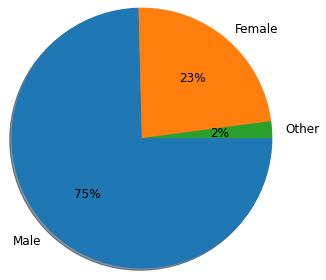

In [150]:
# plot relation between member gender and number of rides
member_gender=bike_df_copy['member_gender'].value_counts()
plt.pie(member_gender.values,labels=member_gender.index,counterclock=False,autopct='%.0f%%',textprops={'size': 'larger'},
                                          shadow=True, radius=1.5);

> As we can see men is the majorty of users with 75% of rides numbers and womens only 23%

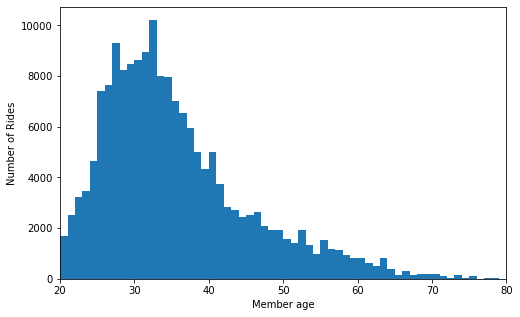

In [151]:
# plot member ages and set limit between 20 and 80 years as below and above this value consider outliers or typo errors
bin_size=np.arange(0,bike_df_copy.age.max()+1,1)
plt.figure(figsize=[8,5])
plt.hist(data=bike_df_copy,x='age',bins=bin_size)
plt.xlabel("Member age")
plt.ylabel("Number of Rides")
plt.xlim([20,80])
plt.show()

> The plot of member ages is right-skewed its normal so we  set limit between 20 and 80 years old as below and above this value consider outliers or typo errors as   some members has 140,120,100 years old.

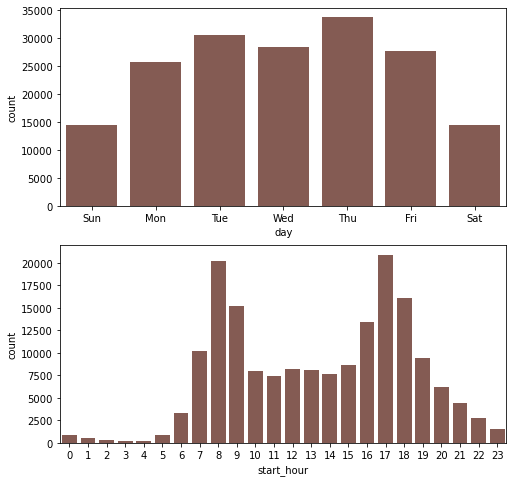

In [152]:
#the relation between day and Number of rides , between month and Number of ride
day_order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
#month_order=['',]
fig, ax=plt.subplots(nrows=2,figsize=[8,8])
default_color=sb.color_palette()[5]
sb.countplot(data=bike_df_copy,x='day',color=default_color,ax=ax[0],order=day_order)
sb.countplot(data=bike_df_copy,x='start_hour',color=default_color,ax=ax[1])

> * As we can see Number of rides in week ends is less than other work days
> * It seems that many users use bikes to go and return back from work as we notice increase in rides number from 7 to 9 Am
when users go to work usually and increase also from 4 to 6 PM when they return back to home.
> * also increase rides number in work days than week end support this observation.

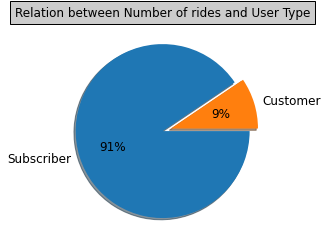

In [153]:
# plot member ages and set limit between 20 and 80 years as below and above this value consider outliers or typo errors
explode=(0,0.1)
plt.pie(bike_df_copy.user_type.value_counts().values,labels=bike_df_copy.user_type.value_counts().index,counterclock=False,autopct='%.0f%%',textprops={'size': 'larger'},
                                          shadow=True, radius=1,explode=explode);
plt.title("Relation between Number of rides and User Type",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


> the majorty of user type is Subscriber as 91% of them and ordinary customer is just 9%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * The plot of member ages is right-skewed its normal so we set limit between 20 and 80 years old as below and above this value consider outliers or typo errors as some members has 140,120,100 years old.
> * As we can see Number of rides in week ends is less than other work days
It seems that many users use bikes to go and return back from work as we notice increase in rides number from 7 to 9 Am when users go to work usually and increase also from 4 to 6 PM when they return back to home.
also increase rides number in work days than week end support this observation.
> * the majorty of user type is Subscriber as they about 91% of them and ordinary customer is just 9% .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The plot of member ages is right-skewed , we use day and hour from start time column as majorty of trips happen in the same day (so i didnot use end time column).i create new column age as compare ages better than using birth date.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!